# Taxi trips - Analysis

The attached .csv file contains general trip information for a taxi fleet of 158
cars over a week, between 08/22/2022 05:00:00 to 08/29/2022 05:00:00.
There are a total of 364 drivers who could drive any car interchangeably during
your turn. Drivers must work for 9 hours and rest for half an hour in the middle of
turn.<br>

### Description of columns:
- **week_id** --> week id
- **driver_id** --> driver id
- **unit_id** --> vehicle id
- **trip_status** --> trip status (completed/cancelled)
- **trip_price** --> trip profit [$]
- **travel_distance** --> travel distance [km]
- **trip_time** --> trip duration [min]
- **average_speed** --> average speed during the trip [km/h]
- **shift_id** --> shift id (relative to the driver and the day worked)
- **trip_request** --> trip request (date and time)
- **end_trip** --> End of trip (date and time)
- **trips_per_hour** --> number of trips in an hour
- **shift_time** --> shift time (range of hours)
- **rest_day** --> rest days
- **shift_start** --> shift start (date and time)

1) How many trips are completed each day of the week?\
2) What time of day generates the most income?\
3) For driver identification: 673 determine the average time between trips (from trip_end of one trip to trip_request of the next trip).\
4) If you had to fire a driver, who would it be? Indicate the driver_id and the reasons supporting your decision.\

Extra:

1) Do you find any correlation between the parameters of the data set that have caught your attention?\
2) Use a segmentation model to classify drivers in order to award rewards and punishments based on their performance.\



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df_base = pd.read_csv('Trips_activity.csv')
df_base.head()

,Unnamed: 0,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno
0,0,49,6,53,completed,70.35,9.36,43.116667,16.873310,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00
1,1,49,6,19,completed,80.97,4.88,18.950000,18.205181,459.0,2022-08-27 16:09,2022-08-27 16:28,3.464870,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00
2,2,49,6,53,rider_cancelled,38.11,0.00,NaN,NaN,NaN,2022-08-25 13:08,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT
3,3,49,6,19,completed,99.43,10.14,40.550000,16.216793,459.0,2022-08-27 10:27,2022-08-27 11:08,1.599289,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00
4,4,49,6,19,completed,640.89,27.97,111.433333,15.060125,456.0,2022-08-24 9:50,2022-08-24 11:42,0.314465,De 09:00 a 18:30,Lu - Ma,2022-08-24 9:00


In [ ]:
df = df_base.drop('Unnamed: 0', axis=1)
df.head(2)

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno
0,49,6,53,completed,70.35,9.36,43.116667,16.873310,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00
1,49,6,19,completed,80.97,4.88,18.950000,18.205181,459.0,2022-08-27 16:09,2022-08-27 16:28,3.464870,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00


In [ ]:
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,id_semana,id_conductor,id_unidad,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,viajes_por_hora
count,21486.0,21486.000000,21486.000000,18889.000000,21486.000000,18283.000000,18259.000000,18259.000000,16712.000000
mean,49.0,656.833845,106.434609,98.562022,10.832123,39.091735,19.981026,28106.821567,1.864612
std,0.0,252.931233,58.763279,63.986745,9.881230,20.839683,9.192492,8576.652177,1.176876
min,49.0,6.000000,1.000000,-78.740000,0.000000,1.366667,0.000000,456.000000,0.171780
25%,49.0,506.000000,57.000000,52.590000,3.350000,24.008333,13.224229,25070.000000,1.094225
50%,49.0,720.000000,109.000000,85.390000,8.510000,35.100000,18.564461,31699.000000,1.582418
75%,49.0,862.000000,155.000000,128.480000,15.960000,49.233333,25.449924,34218.000000,2.310655
max,49.0,980.000000,211.000000,1626.290000,80.380000,207.483333,144.734695,35389.000000,43.902439
Nan,0.0,0.000000,0.000000,2597.000000,0.000000,3203.000000,3227.000000,3227.000000,4774.000000
%Nan,0.0,0.000000,0.000000,12.086940,0.000000,14.907382,15.019082,15.019082,22.219119


### **1) How many trips are completed each day of the week?**

In [ ]:
df.head(3)

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno
0,49,6,53,completed,70.35,9.36,43.116667,16.873310,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00
1,49,6,19,completed,80.97,4.88,18.950000,18.205181,459.0,2022-08-27 16:09,2022-08-27 16:28,3.464870,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00
2,49,6,53,rider_cancelled,38.11,0.00,NaN,NaN,NaN,2022-08-25 13:08,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT


In [ ]:
#I generate a filter of the unique values ​​of the trip_state column to see what information I keep
df['viaje_estado'].value_counts()

completed           18259
rider_cancelled      2726
driver_cancelled      320
delivery_failed       157
fare_split             22
failed                  2
Name: viaje_estado, dtype: int64

In [ ]:
#The trips completed in a week are: 18,259 trips
df_completo = df[df['viaje_estado'] == 'completed']
df_completo.shape # Check the amount of resulting data

(18259, 15)

In [ ]:

# The next step is to identify the dates to see which days there were the most trips
df_completo.head()

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno
0,49,6,53,completed,70.35,9.36,43.116667,16.873310,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00
1,49,6,19,completed,80.97,4.88,18.950000,18.205181,459.0,2022-08-27 16:09,2022-08-27 16:28,3.464870,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00
3,49,6,19,completed,99.43,10.14,40.550000,16.216793,459.0,2022-08-27 10:27,2022-08-27 11:08,1.599289,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00
4,49,6,19,completed,640.89,27.97,111.433333,15.060125,456.0,2022-08-24 9:50,2022-08-24 11:42,0.314465,De 09:00 a 18:30,Lu - Ma,2022-08-24 9:00
5,49,6,11,completed,100.13,14.48,40.200000,30.219130,460.0,2022-08-28 9:46,2022-08-28 10:27,2.086957,De 09:00 a 18:30,Lu - Ma,2022-08-28 9:00


In [ ]:
df_fecha_fin = df_completo.copy()

In [ ]:
df_fecha_fin['fecha_fin'] = pd.to_datetime(df_fecha_fin['final_viaje']).dt.date #extraigo unicamente la fecha de finalización de viajes
df_fecha_fin.head()

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno,fecha_fin
0,49,6,53,completed,70.35,9.36,43.116667,16.873310,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00,2022-08-25
1,49,6,19,completed,80.97,4.88,18.950000,18.205181,459.0,2022-08-27 16:09,2022-08-27 16:28,3.464870,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00,2022-08-27
3,49,6,19,completed,99.43,10.14,40.550000,16.216793,459.0,2022-08-27 10:27,2022-08-27 11:08,1.599289,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00,2022-08-27
4,49,6,19,completed,640.89,27.97,111.433333,15.060125,456.0,2022-08-24 9:50,2022-08-24 11:42,0.314465,De 09:00 a 18:30,Lu - Ma,2022-08-24 9:00,2022-08-24
5,49,6,11,completed,100.13,14.48,40.200000,30.219130,460.0,2022-08-28 9:46,2022-08-28 10:27,2.086957,De 09:00 a 18:30,Lu - Ma,2022-08-28 9:00,2022-08-28


In [ ]:
#I count the unique values ​​per date to obtain the trips per day and the day with the most trips
viajes_fecha = df_fecha_fin['fecha_fin'].value_counts()
viajes_fecha.head()

2022-08-27    2782
2022-08-24    2661
2022-08-28    2647
2022-08-23    2602
2022-08-25    2486
Name: fecha_fin, dtype: int64

In [ ]:

# *Now let's create the graph.
# On the X axis how are we going to organize the data?

In [ ]:
fechas_ordenadas = viajes_fecha.index.sort_values() # order the dates
fechas_ordenadas

Index([2022-08-22, 2022-08-23, 2022-08-24, 2022-08-25, 2022-08-26, 2022-08-27,
       2022-08-28, 2022-08-29],
      dtype='object')

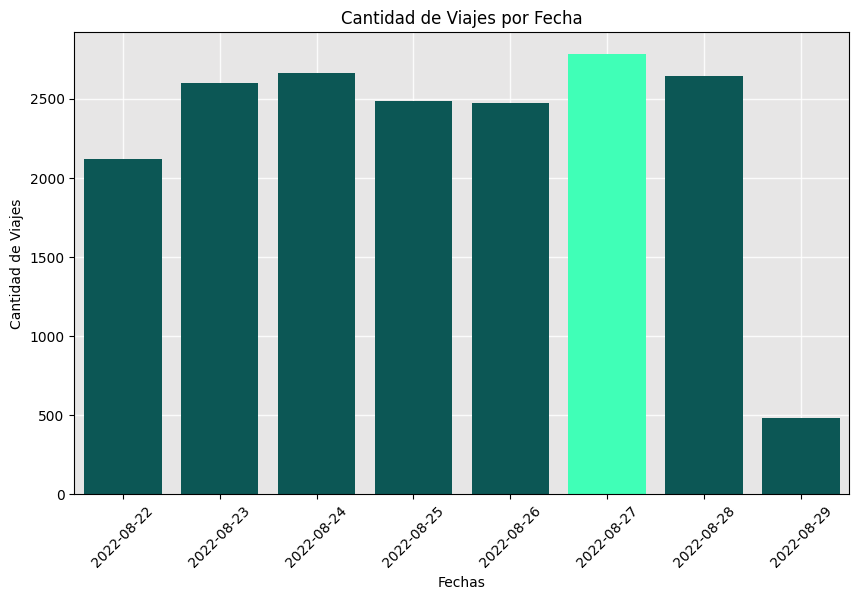

In [ ]:

# Create a graph to visualize the data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=fechas_ordenadas, y=viajes_fecha[fechas_ordenadas], color='#006361')

fecha_mas_viajes = viajes_fecha.idxmax() # the date with the highest number of trips

# highlight the day with the most trips using a different color
color = '#40FFB7'
barra_destacada = fechas_ordenadas.get_loc(fecha_mas_viajes)
ax.patches[barra_destacada].set_facecolor(color)


# tags and titles
ax.set_xlabel('Fechas')
ax.set_ylabel('Cantidad de Viajes')
ax.set_title('Cantidad de Viajes por Fecha')

plt.gca().set_facecolor('#E7E6E6')
plt.gca().set_axisbelow(True)
plt.grid(color='white', linestyle='-', linewidth=1, alpha=0.85)

plt.xticks(rotation=45)# Rotate x-axis labels to improve readability
plt.show()

In the table above you can see the number of trips completed per day.
**08/27/2022 being highlighted as the day when the most trips were made.**

### **2) What time of day generates the most income?**

In [ ]:
df_fecha_fin['hora_fin'] = pd.to_datetime(df_fecha_fin['final_viaje']).dt.hour #extraigo unicamente las horas
df_fecha_fin.head()

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno,fecha_fin,hora_fin
0,49,6,53,completed,70.35,9.36,43.116667,16.873310,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00,2022-08-25,15
1,49,6,19,completed,80.97,4.88,18.950000,18.205181,459.0,2022-08-27 16:09,2022-08-27 16:28,3.464870,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00,2022-08-27,16
3,49,6,19,completed,99.43,10.14,40.550000,16.216793,459.0,2022-08-27 10:27,2022-08-27 11:08,1.599289,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00,2022-08-27,11
4,49,6,19,completed,640.89,27.97,111.433333,15.060125,456.0,2022-08-24 9:50,2022-08-24 11:42,0.314465,De 09:00 a 18:30,Lu - Ma,2022-08-24 9:00,2022-08-24,11
5,49,6,11,completed,100.13,14.48,40.200000,30.219130,460.0,2022-08-28 9:46,2022-08-28 10:27,2.086957,De 09:00 a 18:30,Lu - Ma,2022-08-28 9:00,2022-08-28,10


<Axes: >

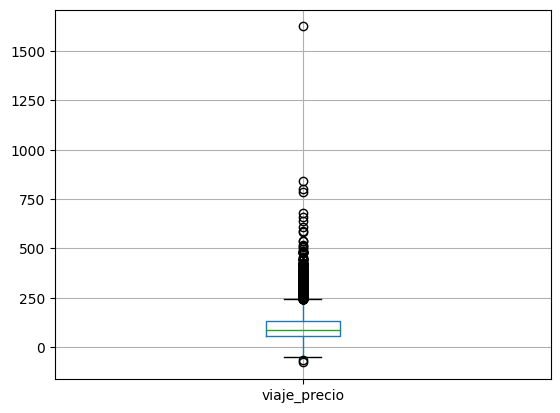

In [ ]:

#evaluate the data in the trip_rev column, to eliminate noisy data
df_fecha_fin.boxplot(column=['viaje_precio'])

In [ ]:

#as you can see I have noisy data, outside the average.
#I have negative data and one data that is very out of range.
ganancia = df_fecha_fin[(df_fecha_fin['viaje_precio'] < 250) & (df_fecha_fin['viaje_precio'] > 0)]
print(ganancia.shape[0])

Cantidad de datos en observación: 17758


In [ ]:
df_hora_precio = ganancia[["viaje_precio","hora_fin"]]
df_promedio = df_hora_precio.groupby('hora_fin', as_index=False).mean()
df_promedio.head(24)

,hora_fin,viaje_precio
0,0,93.053206
1,1,86.333678
2,2,92.034167
3,3,92.888719
4,4,105.537435
5,5,99.032212
6,6,104.711273
7,7,103.717905
8,8,97.017138
9,9,90.026265


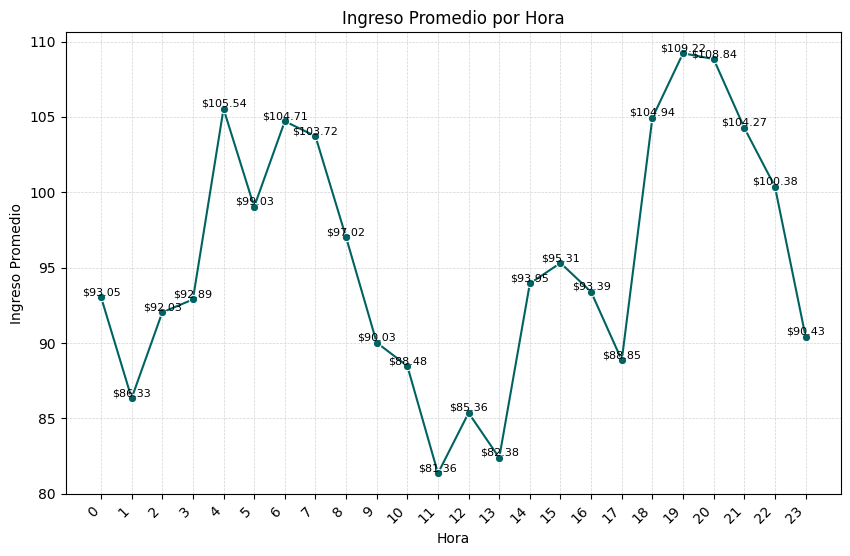

In [ ]:

# Create a line chart
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_promedio, x='hora_fin', y='viaje_precio', marker='o', color='#006361')


# data labels to points
for _, row in df_promedio.iterrows():
    ax.text(row['hora_fin'], row['viaje_precio'], f"${row['viaje_precio']:.2f}", ha='center', va='bottom', fontsize=8)

ax.set_xlabel('Hora')
ax.set_ylabel('Ingreso Promedio')
ax.set_title('Ingreso Promedio por Hora')

ax.set_xticks(df_promedio['hora_fin']) 
# view al hours on the x axis
ax.grid(True, linestyle='--', linewidth=0.5, color='lightgrey')
# add light gray grid lines

plt.xticks(rotation=45, ha='right')
#rotate x-axis labels
plt.show()

In [ ]:
df_promedio_ = df_promedio.sort_values('viaje_precio', ascending=False)
df_promedio_.head(3)

,hora_fin,viaje_precio
19,19,109.220198
20,20,108.835683
4,4,105.537435


In order to define the time in which I obtain the greatest amount of income, it is necessary to consider the average, being the relationship between the amount of income as well as the number of trips made. That is why the hourly data of the median income was evaluated and the filter of the 3 times with the highest income was carried out, obtaining **result between 7:00 p.m. and 8:00 p.m.**

### **3) Determine the average time between trips for driver ID: 673.**

In [ ]:
df2 = df_fecha_fin.copy()
df2.head(1)

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno,fecha_fin,hora_fin
0,49,6,53,completed,70.35,9.36,43.116667,16.87331,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00,2022-08-25,15


In [ ]:
df_673 = df2[df2['id_conductor'] == 673] #filter by id 

print(df_673.shape[0])
df_673.head()

Cantidad de viajes realizados por el conductor 673: 65


,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno,fecha_fin,hora_fin
9000,49,673,65,completed,26.50,2.72,9.016667,18.099815,30477.0,2022-08-22 12:07,2022-08-22 12:16,4.911323,De 05:00 a 14:30,Ju - Vi,2022-08-22 5:00,2022-08-22,12
9001,49,673,18,completed,52.08,5.04,33.750000,9.893129,30480.0,2022-08-27 10:46,2022-08-27 11:20,1.962923,De 05:00 a 14:30,Ju - Vi,2022-08-27 5:00,2022-08-27,11
9002,49,673,18,completed,51.92,9.43,29.566667,21.958603,30480.0,2022-08-27 9:17,2022-08-27 9:47,1.485149,De 05:00 a 14:30,Ju - Vi,2022-08-27 5:00,2022-08-27,9
9004,49,673,18,completed,86.65,11.97,38.766667,20.867798,30480.0,2022-08-27 11:16,2022-08-27 11:55,1.716738,De 05:00 a 14:30,Ju - Vi,2022-08-27 5:00,2022-08-27,11
9005,49,673,65,completed,27.87,3.37,18.350000,12.611226,30479.0,2022-08-24 10:43,2022-08-24 11:01,2.015677,De 05:00 a 14:30,Ju - Vi,2022-08-24 5:00,2022-08-24,11


In [ ]:
df2_673 = df_673.copy()

In [ ]:
df2_673['solicitud_viaje']= pd.to_datetime(df2_673['solicitud_viaje'],format='%Y-%m-%d %H:%M:%S')
df2_673['final_viaje']= pd.to_datetime(df2_673['final_viaje'],format='%Y-%m-%d %H:%M:%S')
df2_673.head()

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno,fecha_fin,hora_fin
9000,49,673,65,completed,26.50,2.72,9.016667,18.099815,30477.0,2022-08-22 12:07:00,2022-08-22 12:16:00,4.911323,De 05:00 a 14:30,Ju - Vi,2022-08-22 5:00,2022-08-22,12
9001,49,673,18,completed,52.08,5.04,33.750000,9.893129,30480.0,2022-08-27 10:46:00,2022-08-27 11:20:00,1.962923,De 05:00 a 14:30,Ju - Vi,2022-08-27 5:00,2022-08-27,11
9002,49,673,18,completed,51.92,9.43,29.566667,21.958603,30480.0,2022-08-27 09:17:00,2022-08-27 09:47:00,1.485149,De 05:00 a 14:30,Ju - Vi,2022-08-27 5:00,2022-08-27,9
9004,49,673,18,completed,86.65,11.97,38.766667,20.867798,30480.0,2022-08-27 11:16:00,2022-08-27 11:55:00,1.716738,De 05:00 a 14:30,Ju - Vi,2022-08-27 5:00,2022-08-27,11
9005,49,673,65,completed,27.87,3.37,18.350000,12.611226,30479.0,2022-08-24 10:43:00,2022-08-24 11:01:00,2.015677,De 05:00 a 14:30,Ju - Vi,2022-08-24 5:00,2022-08-24,11


In [ ]:
df2_673 = df2_673.sort_values(by='solicitud_viaje') #order the values
df2_673.head()

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno,fecha_fin,hora_fin
9038,49,673,65,completed,95.99,5.38,20.483333,15.759154,30477.0,2022-08-22 05:10:00,2022-08-22 05:31:00,2.929211,De 05:00 a 14:30,Ju - Vi,2022-08-22 5:00,2022-08-22,5
9029,49,673,65,completed,80.81,10.67,29.933333,26.936886,30477.0,2022-08-22 05:25:00,2022-08-22 05:55:00,2.097902,De 05:00 a 14:30,Ju - Vi,2022-08-22 5:00,2022-08-22,5
9055,49,673,65,completed,68.96,8.62,22.800000,22.684210,30477.0,2022-08-22 06:00:00,2022-08-22 06:22:00,2.000000,De 05:00 a 14:30,Ju - Vi,2022-08-22 5:00,2022-08-22,6
9064,49,673,65,completed,79.46,10.29,28.266667,21.841982,30477.0,2022-08-22 06:30:00,2022-08-22 06:58:00,1.615799,De 05:00 a 14:30,Ju - Vi,2022-08-22 5:00,2022-08-22,6
9052,49,673,65,completed,192.39,23.40,49.766667,28.211655,30477.0,2022-08-22 07:07:00,2022-08-22 07:56:00,1.205626,De 05:00 a 14:30,Ju - Vi,2022-08-22 5:00,2022-08-22,7


In [ ]:
df2_673.reset_index(inplace=True, drop=True) #initialize the rows in order once sorted
df2_673.head()

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno,fecha_fin,hora_fin
0,49,673,65,completed,95.99,5.38,20.483333,15.759154,30477.0,2022-08-22 05:10:00,2022-08-22 05:31:00,2.929211,De 05:00 a 14:30,Ju - Vi,2022-08-22 5:00,2022-08-22,5
1,49,673,65,completed,80.81,10.67,29.933333,26.936886,30477.0,2022-08-22 05:25:00,2022-08-22 05:55:00,2.097902,De 05:00 a 14:30,Ju - Vi,2022-08-22 5:00,2022-08-22,5
2,49,673,65,completed,68.96,8.62,22.800000,22.684210,30477.0,2022-08-22 06:00:00,2022-08-22 06:22:00,2.000000,De 05:00 a 14:30,Ju - Vi,2022-08-22 5:00,2022-08-22,6
3,49,673,65,completed,79.46,10.29,28.266667,21.841982,30477.0,2022-08-22 06:30:00,2022-08-22 06:58:00,1.615799,De 05:00 a 14:30,Ju - Vi,2022-08-22 5:00,2022-08-22,6
4,49,673,65,completed,192.39,23.40,49.766667,28.211655,30477.0,2022-08-22 07:07:00,2022-08-22 07:56:00,1.205626,De 05:00 a 14:30,Ju - Vi,2022-08-22 5:00,2022-08-22,7


In [ ]:
dif_tiempo = []

In [ ]:
# Let's make a for to record the time difference between the end of a trip and the start of the next trip
# Taking into account that the time has to be less than 30 minutes, and if this condition is met,
# record the time difference in seconds in the time_diff list

for i in range(len(df2_673)-1):    # so the last one will not iterate with anything
  if df2_673['final_viaje'][i] < df2_673['solicitud_viaje'][i+1]:
    dif = df2_673['solicitud_viaje'][i+1] - df2_673['final_viaje'][i]
    if dif.seconds / 3600 < 0.5:    
# 0.5 refers to 30 min (if the difference is less than 30 min it is stored)
      dif_tiempo.append(dif.seconds)
      
#only the waiting intervals between trips are considered for the study.
#not like that, trips started before finishing the previous one.
#the intervals where work hours and lunch hours ended are not considered

In [ ]:
len(dif_tiempo)

27

In [ ]:
print(dif_tiempo)

[300, 480, 540, 720, 420, 420, 1200, 180, 1080, 360, 300, 360, 60, 60, 180, 900, 1140, 840, 720, 420, 840, 120, 1260, 600, 60, 120, 1680]


In [ ]:
df_tiempo = pd.DataFrame(dif_tiempo)
print('Mean duration is:', round(df_tiempo.mean()[0]/60,2) ,'minutes')

El promedio entre viajes es de: 9.48 minutos


The average time that driver 673 takes between finishing one trip and starting the next is **9.48 minutes**. Taking into account that trips were considered within working hours and trips started before the end of the previous one were excluded.

### **4) If you had to fire a driver, who would it be? Indicate the driver_id and the reasons supporting your decision.**

In [ ]:
df.head(2)

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno
0,49,6,53,completed,70.35,9.36,43.116667,16.873310,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00
1,49,6,19,completed,80.97,4.88,18.950000,18.205181,459.0,2022-08-27 16:09,2022-08-27 16:28,3.464870,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00


In [ ]:
#I would start with who made the least number of trips
df_viajes = df_completo['id_conductor'].value_counts()    # we already had a df where we filtered the trips that had been completed df_complete
df_viajes = df_viajes.sort_values(ascending=True)
df_viajes.head()

773    1
463    7
975    8
619    8
949    9
Name: id_conductor, dtype: int64

Answer: Although driver 773 made only 1 trip in the week, I would find out what the reasons were, since he could have been sick or had taken vacation the rest of the days. I feel a single parameter is not considered representative.

In [ ]:
# we evaluate which driver canceled the most trips
df_cancelado = df[df['viaje_estado'] == 'driver_cancelled']
df_cancelado.head()

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno
13,49,6,19,driver_cancelled,20.78,0.0,NaN,NaN,NaN,2022-08-27 14:02,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT
85,49,12,40,driver_cancelled,22.26,0.0,NaN,NaN,NaN,2022-08-25 10:34,NaT,NaN,De 07:00 a 16:30,Vi - Sa,NaT
101,49,12,40,driver_cancelled,15.82,0.0,NaN,NaN,NaN,2022-08-22 15:03,NaT,NaN,De 07:00 a 16:30,Vi - Sa,NaT
179,49,22,10,driver_cancelled,22.12,0.0,NaN,NaN,NaN,2022-08-27 15:07,NaT,NaN,De 07:00 a 16:30,Ju - Vi,NaT
232,49,26,66,driver_cancelled,15.82,0.0,NaN,NaN,NaN,2022-08-27 2:43,NaT,NaN,De 19:00 a 04:30,Mi - Ju,NaT


In [ ]:
df_cancelado = df_cancelado['id_conductor'].value_counts()
df_cancelado.head()

908    5
559    5
173    5
573    5
714    4
Name: id_conductor, dtype: int64

In [ ]:
#filter the trips made by the 4 drivers who made the most cancellations
driver_ids = [908, 559, 173, 573]
df_drivers = df_completo[df_completo['id_conductor'].isin(driver_ids)]# isin confirms that they are in the dataframe
df_drivers.head()

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno
1420,49,173,46,completed,108.29,14.57,40.083333,21.809563,9595.0,2022-08-25 9:51,2022-08-25 10:31,1.434263,De 09:00 a 18:30,Vi - Sa,2022-08-25 9:00
1422,49,173,46,completed,85.61,16.15,55.083333,18.311811,9595.0,2022-08-25 12:22,2022-08-25 13:17,1.133858,De 09:00 a 18:30,Vi - Sa,2022-08-25 9:00
1423,49,173,85,completed,63.02,6.43,43.666667,8.835114,9596.0,2022-08-28 13:12,2022-08-28 13:56,0.956683,De 09:00 a 18:30,Vi - Sa,2022-08-28 9:00
1424,49,173,46,completed,41.75,7.42,21.783333,20.437643,9594.0,2022-08-24 10:20,2022-08-24 10:42,1.042270,De 09:00 a 18:30,Vi - Sa,2022-08-24 9:00
1426,49,173,85,completed,107.68,13.75,55.950000,17.283520,9596.0,2022-08-28 15:07,2022-08-28 16:03,0.688863,De 09:00 a 18:30,Vi - Sa,2022-08-28 9:00


In [ ]:
# I evaluate the average earnings of the entire fleet vs. drivers with low performance
df_prom_ganancia = df_completo['viaje_precio'].mean()
print('La ganancia promedio es =', df_prom_ganancia)

df_drivers.groupby(['id_conductor'])['viaje_precio'].mean()

La ganancia promedio es = 101.08128648885481


id_conductor
173     95.328000
559    107.929302
573     78.403607
908     97.530303
Name: viaje_precio, dtype: float64

Of the 4 drivers, we get that 573 is well below the average earnings.

In [ ]:
#I evaluate the average travel time of the entire fleet vs. drivers with low performance
df_tiempo_viaje = df_completo['tiempo_en_viaje'].mean()
print('El tiempo promedio es =', df_tiempo_viaje)

df_drivers.groupby(['id_conductor'])['tiempo_en_viaje'].mean()

El tiempo promedio es = 39.07628658008987


id_conductor
173    41.203667
559    46.786434
573    37.466393
908    33.499747
Name: tiempo_en_viaje, dtype: float64

In [ ]:
# and finally I compare it with the number of trips made
df_drivers['id_conductor'].value_counts()

908    66
573    61
173    50
559    43
Name: id_conductor, dtype: int64


Finally, it is decided to fire driver 573. Since through the analysis of longer travel times and greater number of trips made, he has the highest cancellations and lowest income. So it is the least profitable driver.  

### **5) Do you find any correlation between the parameters in the data set?**

In [ ]:
df.head(2)

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno
0,49,6,53,completed,70.35,9.36,43.116667,16.873310,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00
1,49,6,19,completed,80.97,4.88,18.950000,18.205181,459.0,2022-08-27 16:09,2022-08-27 16:28,3.464870,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00


In [ ]:
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,id_semana,id_conductor,id_unidad,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,viajes_por_hora
count,21486.0,21486.000000,21486.000000,18889.000000,21486.000000,18283.000000,18259.000000,18259.000000,16712.000000
mean,49.0,656.833845,106.434609,98.562022,10.832123,39.091735,19.981026,28106.821567,1.864612
std,0.0,252.931233,58.763279,63.986745,9.881230,20.839683,9.192492,8576.652177,1.176876
min,49.0,6.000000,1.000000,-78.740000,0.000000,1.366667,0.000000,456.000000,0.171780
25%,49.0,506.000000,57.000000,52.590000,3.350000,24.008333,13.224229,25070.000000,1.094225
50%,49.0,720.000000,109.000000,85.390000,8.510000,35.100000,18.564461,31699.000000,1.582418
75%,49.0,862.000000,155.000000,128.480000,15.960000,49.233333,25.449924,34218.000000,2.310655
max,49.0,980.000000,211.000000,1626.290000,80.380000,207.483333,144.734695,35389.000000,43.902439
Nan,0.0,0.000000,0.000000,2597.000000,0.000000,3203.000000,3227.000000,3227.000000,4774.000000
%Nan,0.0,0.000000,0.000000,12.086940,0.000000,14.907382,15.019082,15.019082,22.219119


In [ ]:
df_limpio = df.copy()
df_limpio.dropna(subset=['viaje_precio', 'tiempo_en_viaje', 'veloc_media', 'id_turno', 'viajes_por_hora'], inplace=True)

In [ ]:
df_limpio.shape

(16712, 15)

In [ ]:
df_limpio.head(1)

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno
0,49,6,53,completed,70.35,9.36,43.116667,16.87331,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00


In [ ]:
# I'm going to keep only the columns that interest me
df_limpio.drop(['id_semana', 'id_conductor', 'id_unidad','viaje_estado', 'id_turno',
                'solicitud_viaje', 'final_viaje', 'tiempo_turno', 'dia_descanso', 'inicio_turno'], axis=1, inplace=True)
df_limpio.head(2)

,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,viajes_por_hora
0,70.35,9.36,43.116667,16.873310,1.802704
1,80.97,4.88,18.950000,18.205181,3.464870


<Axes: >

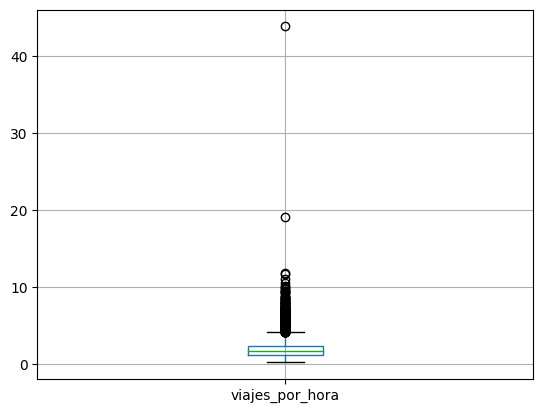

In [ ]:
df_limpio.boxplot(column=['viajes_por_hora'])

In [ ]:
df_limpio = df_limpio[(df_limpio['viajes_por_hora'] <= 7)]
print( df_limpio.shape[0])

Cantidad de datos en observación: 16648


<Axes: >

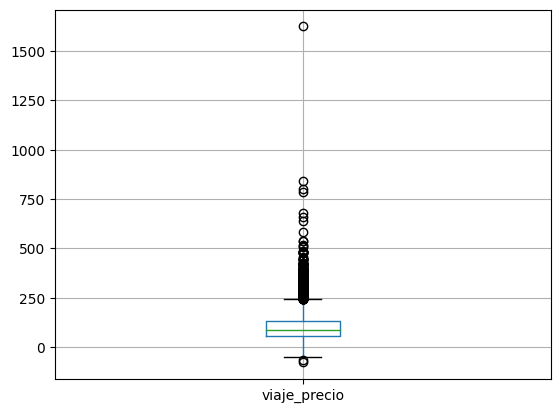

In [ ]:
df_limpio.boxplot(column=['viaje_precio'])

In [ ]:
df_limpio = df_limpio[(df_limpio['viaje_precio'] <= 250) & (df_limpio['viaje_precio'] > 0)]
print( df_limpio.shape[0])

Cantidad de datos en observación: 16193


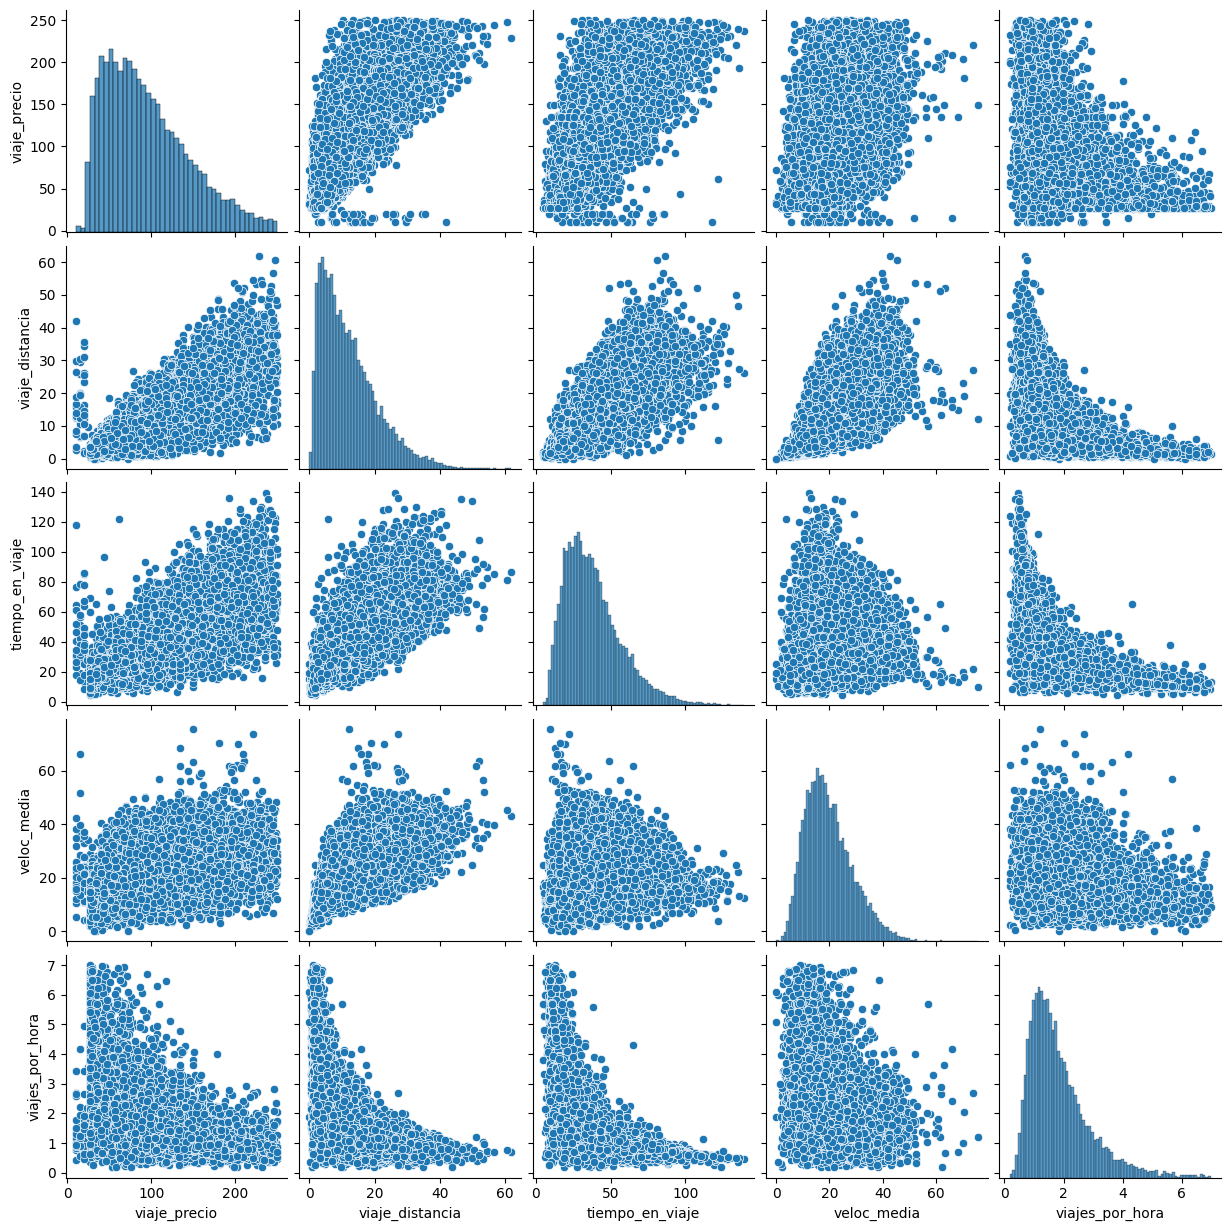

In [ ]:
sns.pairplot(df_limpio)

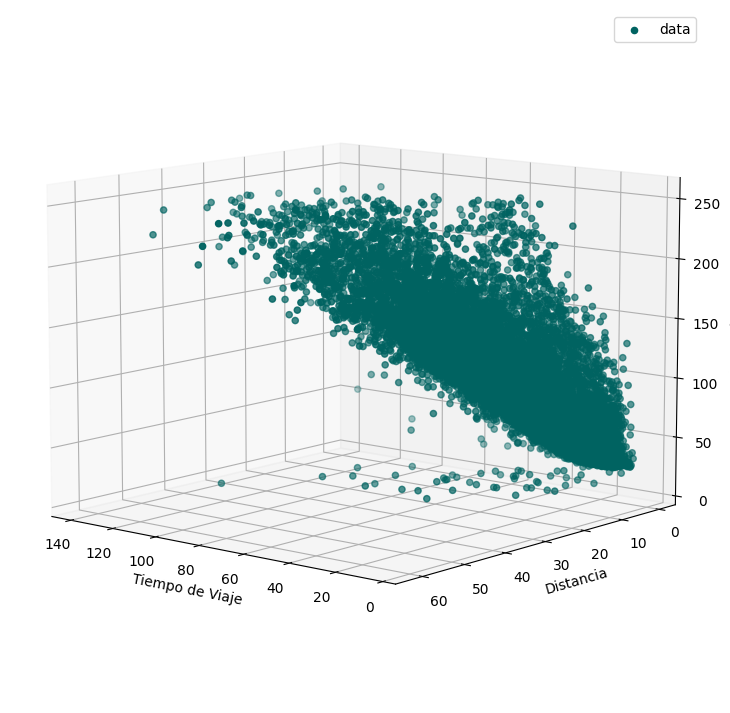

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_limpio['tiempo_en_viaje'], df_limpio['viaje_distancia'], df_limpio['viaje_precio'], color='#006361', label='data')

ax.set_xlabel('Tiempo de Viaje')
ax.set_ylabel('Distancia')
ax.set_zlabel('Ganancias')
ax.legend()
ax.view_init(10, 130)
plt.show()

In this graph we can find two data patterns.
The first pattern, which is to assume, greater distances and travel times generate greater profits.
But another pattern shows us that in the range between 10km and 40km, the gains are greater and are done more efficiently. This range being the optimal one to generate greater profits.

### **6) Creation of a segmentation model to classify drivers in order to grant rewards and punishments according to their performance**

In [ ]:
df.head()

,id_semana,id_conductor,id_unidad,viaje_estado,viaje_precio,viaje_distancia,tiempo_en_viaje,veloc_media,id_turno,solicitud_viaje,final_viaje,viajes_por_hora,tiempo_turno,dia_descanso,inicio_turno
0,49,6,53,completed,70.35,9.36,43.116667,16.873310,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00
1,49,6,19,completed,80.97,4.88,18.950000,18.205181,459.0,2022-08-27 16:09,2022-08-27 16:28,3.464870,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00
2,49,6,53,rider_cancelled,38.11,0.00,NaN,NaN,NaN,2022-08-25 13:08,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT
3,49,6,19,completed,99.43,10.14,40.550000,16.216793,459.0,2022-08-27 10:27,2022-08-27 11:08,1.599289,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00
4,49,6,19,completed,640.89,27.97,111.433333,15.060125,456.0,2022-08-24 9:50,2022-08-24 11:42,0.314465,De 09:00 a 18:30,Lu - Ma,2022-08-24 9:00


In [ ]:
# let's convert the trips dataframe into a drivers dataframe
# first we create a dictionary to store the totals per driver
conductores_dict = {
    'id_conductor': [],
    'viajes_completados': [],
    'ganancias_totales': [],
    'km_recorridos': []}

In [ ]:
id_conductores = df['id_conductor'].unique() 
#unique driver id listing
id_conductores

array([  6,  12,  22,  26,  31,  38,  39,  49,  51,  61,  73, 104, 116,
       126, 128, 134, 144, 159, 160, 161, 164, 173, 174, 178, 183, 185,
       195, 196, 211, 228, 236, 242, 261, 263, 267, 280, 284, 288, 301,
       306, 314, 318, 326, 327, 332, 336, 344, 347, 354, 356, 364, 370,
       374, 376, 378, 387, 393, 394, 403, 406, 411, 413, 414, 422, 424,
       426, 430, 433, 440, 444, 451, 453, 456, 458, 462, 463, 464, 468,
       474, 479, 480, 491, 500, 506, 507, 510, 515, 519, 520, 523, 532,
       537, 542, 546, 556, 559, 560, 564, 566, 567, 568, 571, 572, 573,
       575, 576, 578, 584, 586, 591, 593, 596, 598, 601, 604, 605, 606,
       607, 608, 609, 616, 617, 618, 619, 624, 625, 628, 633, 640, 642,
       644, 647, 650, 653, 657, 660, 661, 663, 664, 668, 670, 671, 672,
       673, 675, 677, 678, 679, 680, 682, 683, 684, 688, 691, 693, 694,
       695, 698, 701, 703, 706, 707, 708, 709, 712, 713, 714, 715, 717,
       720, 721, 722, 723, 725, 726, 728, 733, 734, 735, 738, 74

In [ ]:
# we store the dataframe information in the dictionary
for driver_id in id_conductores:
    id_con = df[df['id_conductor'] == driver_id]
    completed_trips = id_con[id_con['viaje_estado'] == 'completed']

    total_completos = len(completed_trips)
    total_ganancias = completed_trips['viaje_precio'].sum()
    total_distancias = completed_trips['viaje_distancia'].sum()

    conductores_dict['id_conductor'].append(driver_id)
    conductores_dict['viajes_completados'].append(total_completos)
    conductores_dict['ganancias_totales'].append(total_ganancias)
    conductores_dict['km_recorridos'].append(total_distancias)

In [ ]:
# create a new dataframe from the dictionary
df_conductores = pd.DataFrame(conductores_dict)

In [ ]:
df_conductores.head(20)
# do we have target column?

,id_conductor,viajes_completados,ganancias_totales,km_recorridos
0,6,56,6151.20,735.37
1,12,48,4864.37,582.81
2,22,54,4820.03,586.37
3,26,76,5663.37,500.61
4,31,55,6074.78,698.75
5,38,49,4130.09,515.25
6,39,55,5568.10,725.85
7,49,61,6561.85,863.77
8,51,51,4323.07,349.38
9,61,33,3990.06,464.12


In [ ]:
des = df_conductores.describe()
des.loc['Nan'] = df_conductores.isna().sum()
des.loc['%Nan'] = (df_conductores.isna().mean())*100
des

,id_conductor,viajes_completados,ganancias_totales,km_recorridos
count,364.000000,364.000000,364.000000,364.000000
mean,676.192308,50.162088,5070.448379,637.632637
std,250.625677,17.330322,1721.433697,224.613286
min,6.000000,1.000000,126.160000,22.050000
25%,535.750000,42.000000,4254.442500,492.102500
50%,746.500000,54.000000,5473.525000,683.740000
75%,877.250000,62.000000,6272.835000,806.125000
max,980.000000,107.000000,8613.670000,1075.810000
Nan,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000


In [ ]:
print('Available data: ', df_conductores.shape[0])

Datos disponibles para analizar:  364


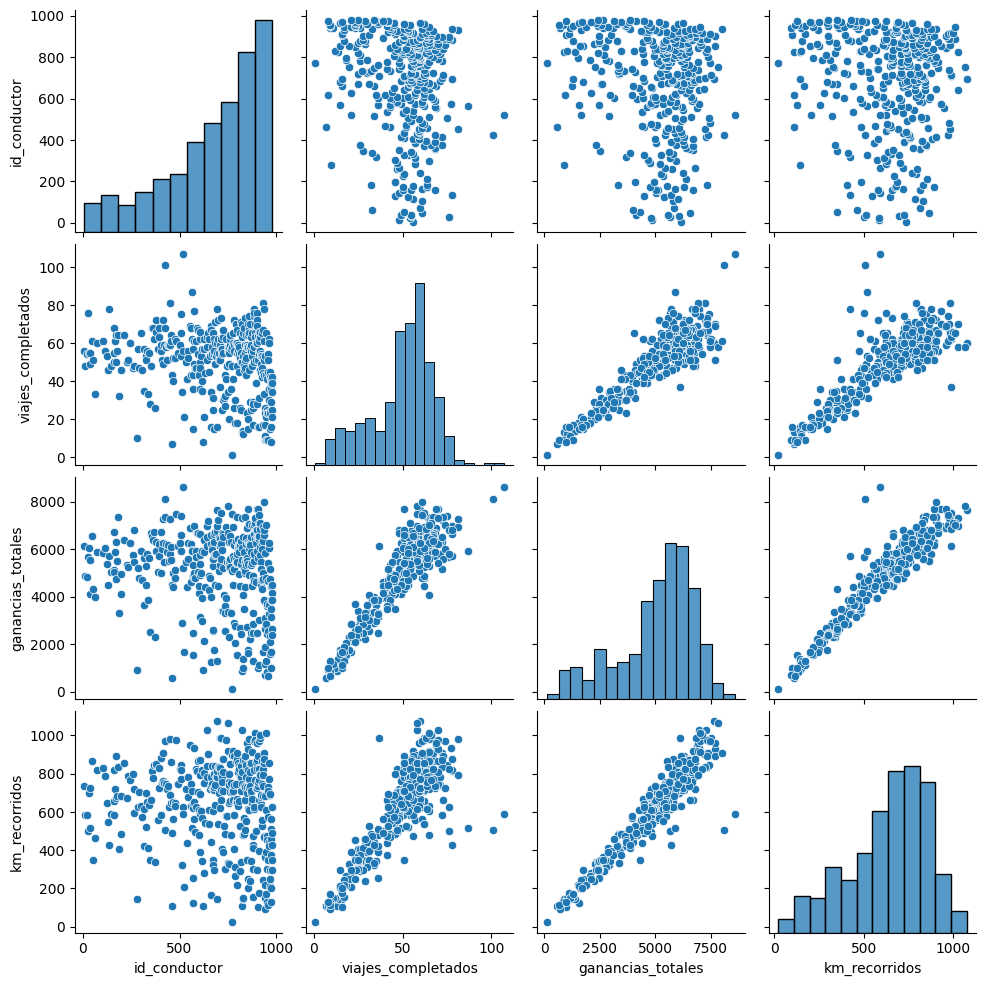

In [ ]:
sns.pairplot(df_conductores)
plt.show()

In [ ]:
df2_conductores = df_conductores.drop('id_conductor', axis=1)
df2_conductores.head()

,viajes_completados,ganancias_totales,km_recorridos
0,56,6151.20,735.37
1,48,4864.37,582.81
2,54,4820.03,586.37
3,76,5663.37,500.61
4,55,6074.78,698.75


In [ ]:
X = df2_conductores.values

In [ ]:
# train different Kmeans models on a range of clusters (2, 10)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_best_model(X, max_clusters=10):
    n_clusters = list(range(2, max_clusters+1)) ## --> [2, 3, 4, 5, 6, 7, 8, 9, 10]
    ensayos = len(n_clusters)                   ## --> 9 (Number of items in cluster list)

# I create two arrays that will store the errors and score
    array_error = np.zeros((ensayos))
    array_score = np.zeros((ensayos))

    for i in range(ensayos):
        kmeans = KMeans(n_clusters=n_clusters[i], init="k-means++", random_state=0) #As you iterate, the number of clusters varies.
        kmeans.fit(X) # Training
        array_error[i] = kmeans.inertia_ # calculate and save the error
        array_score[i] = silhouette_score(X, kmeans.labels_) # calculate and save the score with silhouette_score

    return array_error, array_score, n_clusters

In [ ]:
# we pass the data to the find_best_model function
array_error, array_score, n_clusters = find_best_model(X)

C:\Users\DaianaMaríaBujan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DaianaMaríaBujan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DaianaMaríaBujan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DaianaMaríaBujan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [ ]:
#  graph the error and determine the break point (elbow point) to determine the best number of clusters
def graficar_punto_codo(array_error, array_score, n_clusters):
  fig = plt.figure()
  ax = fig.add_subplot()

  ax.plot(n_clusters, array_error/array_error.max(), label='error')
  ax.plot(n_clusters, array_score, label='score')

  ax.grid('dashed')
  ax.legend()

  plt.show()

  best_cluster = n_clusters[array_score.argmax()]
  print('The best result is achieved with clusters=', best_cluster)

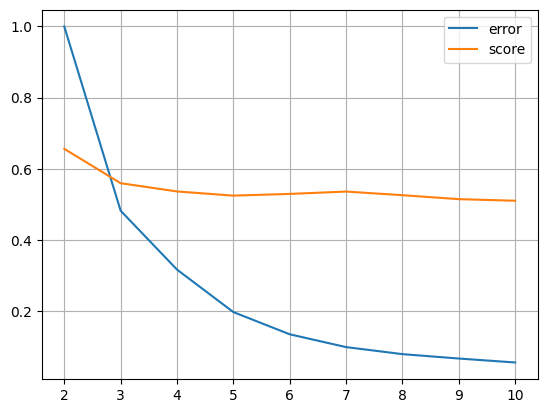

El mejor resultado se consigue con clusters= 2


In [ ]:
graficar_punto_codo(array_error, array_score, n_clusters)


Although the result we obtain is the elbow point in 2, the best point is 3

In [ ]:
# train the model with 3
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)

C:\Users\DaianaMaríaBujan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

# add a new column that groups each driver according to their performance
df_conductores['categoria'] = labels
df_conductores.head(10)

,id_conductor,viajes_completados,ganancias_totales,km_recorridos,categoria
0,6,56,6151.20,735.37,0
1,12,48,4864.37,582.81,2
2,22,54,4820.03,586.37,2
3,26,76,5663.37,500.61,2
4,31,55,6074.78,698.75,0
5,38,49,4130.09,515.25,2
6,39,55,5568.10,725.85,2
7,49,61,6561.85,863.77,0
8,51,51,4323.07,349.38,2
9,61,33,3990.06,464.12,2


In [ ]:

# name of the category
condicion = [
    df_conductores['categoria'] == 0,
    df_conductores['categoria'] == 1,
    df_conductores['categoria'] == 2
]

performance = ['Sobre', 'Baja', 'Buena']

df_conductores['performance'] = np.select(condicion, performance, default='Categoría no válida')

In [ ]:
df_conductores

,id_conductor,viajes_completados,ganancias_totales,km_recorridos,categoria,performance
0,6,56,6151.20,735.37,0,Sobre
1,12,48,4864.37,582.81,2,Buena
2,22,54,4820.03,586.37,2,Buena
3,26,76,5663.37,500.61,2,Buena
4,31,55,6074.78,698.75,0,Sobre
...,...,...,...,...,...,...
359,976,42,4509.19,623.91,2,Buena
360,977,39,4159.95,490.52,2,Buena
361,978,25,2648.22,349.79,1,Baja
362,979,21,2413.40,298.30,1,Baja


In [ ]:
# we are going to calculate the accuracy of the model
from sklearn.metrics import silhouette_score
silhouette_score (X, kmeans.labels_)

0.5593251659350711

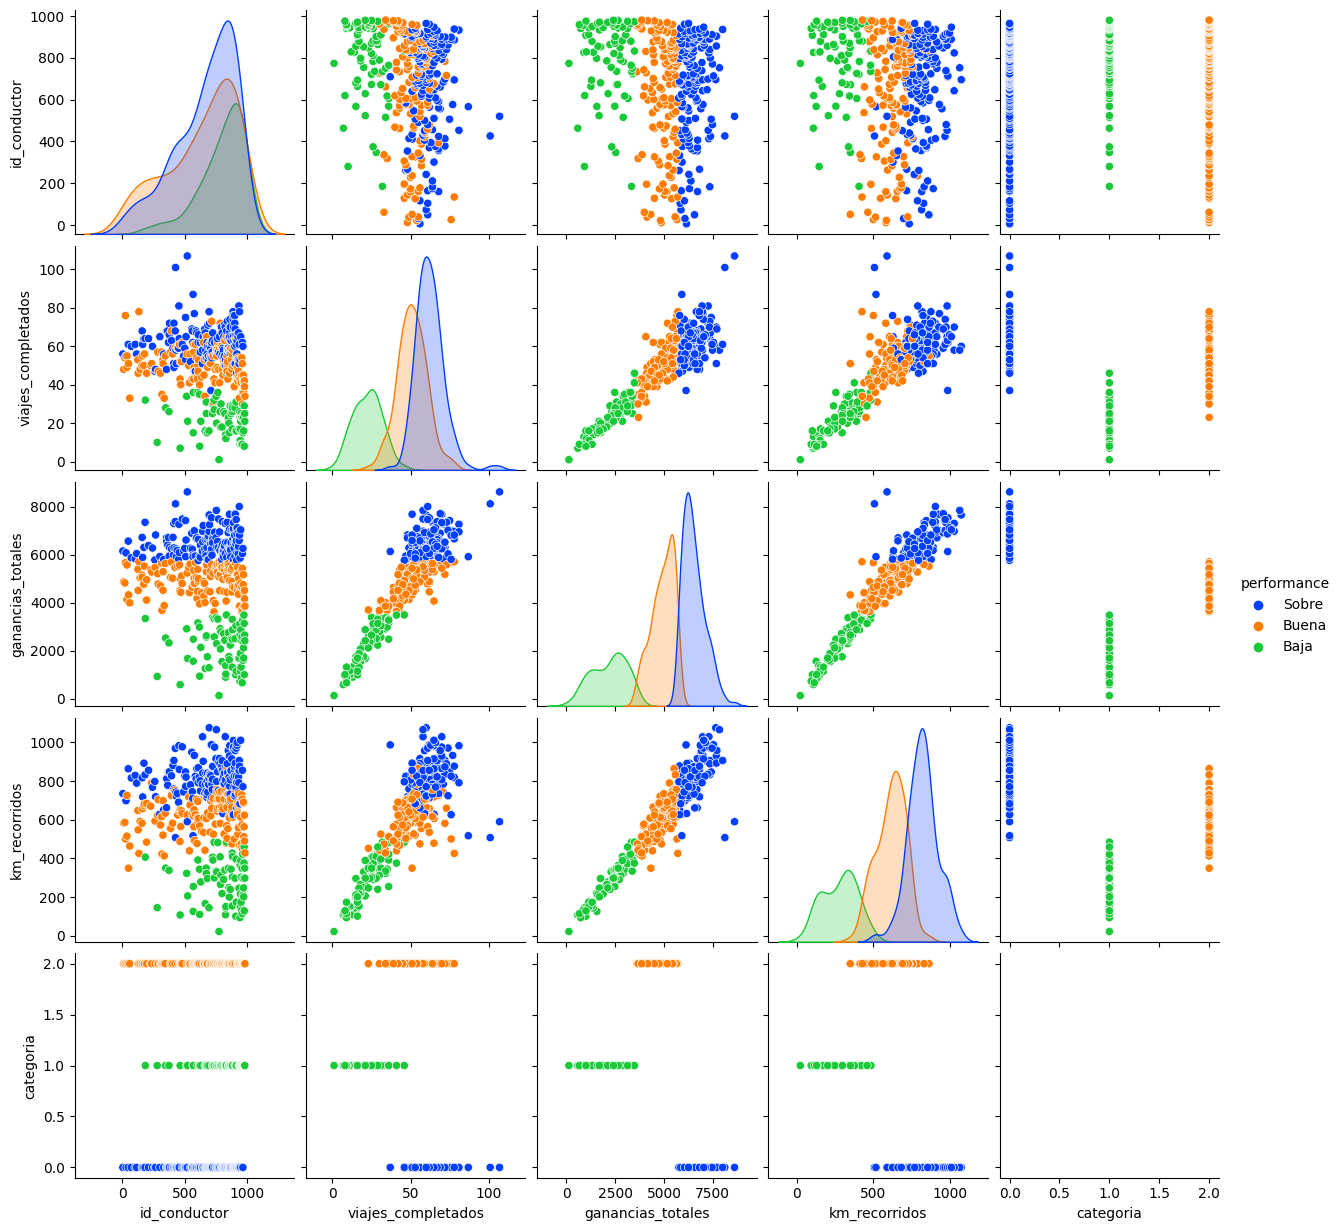

In [ ]:
sns.pairplot(df_conductores, hue='performance', palette='bright')
plt.show()

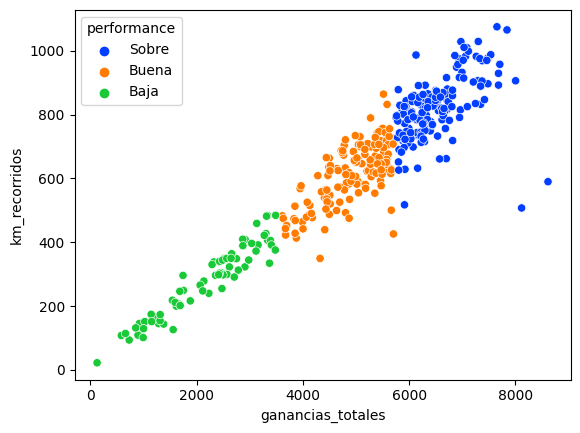

In [ ]:
sns.scatterplot(data=df_conductores, x='ganancias_totales', y='km_recorridos', hue='performance', palette='bright')
plt.show()

In [ ]:
grupos = df_conductores.groupby('performance')

for categoria, datos in grupos:
    viajes = int(datos['viajes_completados'].mean())
    distancia = int(datos['km_recorridos'].mean())
    ganancias = int(datos['ganancias_totales'].mean())
    print(f"The means for the group {categoria}, of completed trips is {viajes}, of km_traveled is {distancia} and of total_earnings is {ganancias}")


Las medias para el grupo Baja, de viajes completados es 22, de km_recorridos es 277 y de ganancias_totales es 2170
Las medias para el grupo Buena, de viajes completados es 50, de km_recorridos es 614 y de ganancias_totales es 4921
Las medias para el grupo Sobre, de viajes completados es 62, de km_recorridos es 822 y de ganancias_totales es 6521


Proving model:

In [ ]:
# enter data of a new driver
X_prueba = pd.DataFrame({'viajes_completados': [55], 'ganancias_totales':[3000], 'km_recorridos':[700]})

labels = kmeans.predict(X_prueba.values)
labels

array([1])